In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from keras.utils.np_utils import to_categorical
from keras import optimizers
import tensorflow as tf
from keras.datasets import cifar100

# NumPy
import numpy as np

# Python Std Lib
import os

# User Lib
dropout = 0.2

# get the training and test data
(input_train, output_train), (input_test, output_test) = cifar100.load_data()

# creating the basic model
model = Sequential()

# 30 Conv Layer
model.add(Conv2D(30, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(32, 32, 3)))
# 15 Max Pool Layer
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Dropout(dropout))
# 13 Conv Layer
model.add(Conv2D(13, kernel_size=(3,3), padding='valid', activation='relu'))
# 6 Max Pool Layer
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(Dropout(dropout))
# Flatten the Layer for transitioning to the Fully Connected Layers
model.add(Flatten())
# 120 Fully Connected Layer
model.add(Dense(120, activation='relu'))
# 84 Fully Connected Layer
model.add(Dense(86, activation='relu'))
# 100 Output
model.add(Dense(100, activation='softmax'))

# compile the model
initial_learning_rate = 0.001
sgd = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)

def scheduler(epoch, lr):
  if epoch < 100:
    return 0.02
  elif epoch < 200:
    return 0.01
  elif epoch < 400:
    return 0.005
  elif epoch < 700:
    return 0.003
  else: return 0.001    

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)



model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
save_dir = '/content/drive/MyDrive/ECE6930/Lenet-0222-01/cifar100/1dropout/1'
checkpointer = keras.callbacks.ModelCheckpoint(os.path.join(save_dir, '{epoch:03d}.h5'), monitor='val_loss', verbose=0,						save_best_only=False, 
 								save_weights_only=False, mode='auto', 
 								period=10)


# train the model
history = model.fit(input_train/255, to_categorical(output_train), epochs=1000, 
           validation_data=(input_test/255, to_categorical(output_test)),
                    batch_size=128,callbacks=[callback,checkpointer])


# test
score = model.evaluate(input_test/255, to_categorical(output_test), batch_size=128)

# print test set results
print("Testset Loss: %f" % score[0])
print("Testset Accuracy: %f" % score[1])



Epoch 1/1000
391/391 [==============================] - 4s 8ms/step - loss: 4.6043 - accuracy: 0.0106 - val_loss: 4.6013 - val_accuracy: 0.0121 - lr: 0.0200
Epoch 2/1000
391/391 [==============================] - 2s 6ms/step - loss: 4.5960 - accuracy: 0.0130 - val_loss: 4.5842 - val_accuracy: 0.0173 - lr: 0.0200
Epoch 3/1000
391/391 [==============================] - 3s 7ms/step - loss: 4.5496 - accuracy: 0.0185 - val_loss: 4.4950 - val_accuracy: 0.0248 - lr: 0.0200
Epoch 4/1000
391/391 [==============================] - 3s 8ms/step - loss: 4.4449 - accuracy: 0.0273 - val_loss: 4.3524 - val_accuracy: 0.0346 - lr: 0.0200
Epoch 5/1000
391/391 [==============================] - 2s 6ms/step - loss: 4.2791 - accuracy: 0.0421 - val_loss: 4.1837 - val_accuracy: 0.0558 - lr: 0.0200
Epoch 6/1000
391/391 [==============================] - 2s 6ms/step - loss: 4.1635 - accuracy: 0.0590 - val_loss: 4.1417 - val_accuracy: 0.0654 - lr: 0.0200
Epoch 7/1000
391/391 [==============================] - 2s

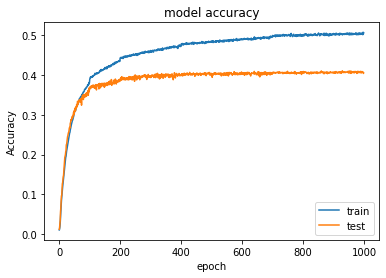

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("epoch")
plt.legend(["train","test"],loc="lower right")
plt.show()


In [ ]:
print(history.history)

{'loss': [4.604349613189697, 4.596037864685059, 4.549551963806152, 4.444911479949951, 4.279093265533447, 4.163459777832031, 4.087595462799072, 4.020031452178955, 3.9525146484375, 3.891193389892578, 3.845459461212158, 3.801543951034546, 3.764559030532837, 3.7262015342712402, 3.6866140365600586, 3.643212080001831, 3.592010021209717, 3.541990041732788, 3.5053985118865967, 3.4581527709960938, 3.421414375305176, 3.3830039501190186, 3.3504793643951416, 3.3188862800598145, 3.287250518798828, 3.258096218109131, 3.225213050842285, 3.1992671489715576, 3.1740293502807617, 3.149219036102295, 3.1273341178894043, 3.0961575508117676, 3.080125570297241, 3.0559535026550293, 3.033604621887207, 3.0180277824401855, 3.0011212825775146, 2.974440574645996, 2.964852809906006, 2.9421169757843018, 2.9236371517181396, 2.912888526916504, 2.8979272842407227, 2.88283371925354, 2.8690452575683594, 2.8552286624908447, 2.84132719039917, 2.823136329650879, 2.8102283477783203, 2.7972755432128906, 2.7905874252319336, 2.7